# Test of Piecewise Smooth Quadratic Estimators

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import interval as ival
import psl_under as pl
import psqe_under as pq

Auxiliary plot routine

In [2]:
def plot_problem(flist, minlist, a, b):
    colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
    step = (b - a) / 1000.
    ta = np.arange(a, b + step, step)
    num_points = len(ta)
    num_funcs = len(flist)

    fta = np.empty([num_funcs, num_points])
    print(fta)

    for i in range(num_funcs):
        for j in range(num_points):
            fta[i, j] = flist[i](ta[j])
    lb = np.amin(fta)
    ub = np.amax(fta)
    d = (ub - lb) * 0.1
    for i in range(num_funcs):
        plt.plot(ta, fta[i, :], colors[i])
    for point in min_list:
        plt.scatter(point[0], point[1], s=20)
    plt.ylim([lb - d, ub + d])
    plt.show()

Test problem

In [4]:
x = sym.symbols('x')
# e_f = 5 * x ** 4 + 2 * x ** 3 - 4 * x + 1
e_f=-x**3
e_nf=-e_f
e_df = sym.diff(e_f)
e_ndf = -e_df
e_ddf = sym.diff(e_df)
print(e_f, e_df, e_ddf)
f = sym.lambdify(x, e_f)
nf=sym.lambdify(x,e_nf)
df = sym.lambdify(x, e_df)
ndf = sym.lambdify(x, e_ndf)
ddf = sym.lambdify(x, e_ddf)
a = 1.
b = 2.
idef = ival.Interval([a, b])
di = df(idef)

print(f(idef), df(idef), ddf(idef))
ddi = ddf(idef)
print(di, ddi)

-x**3 -3*x**2 -6*x
[-8.0, -1.0] [-12.0, -3.0] [-12.0, -6.0]
[-12.0, -3.0] [-12.0, -6.0]


In [5]:

# estim = pq.PSQE_Under(a, b, ddi.x[0], ddi.x[1], f, df)
l = max(-di.x[0], di.x[1])
L = max(-ddi.x[0], ddi.x[1])
# print(L)
estim_pl = pl.PSL_Under(a, b, di.x[0], di.x[1], f)
estim_plip = pl.PSL_Under(a, b, -l, l, f)
estim_ob = pq.PSQE_Under(a, b, -ddi.x[1], -ddi.x[0], nf, ndf)
estim_int = pq.PSQE_Under(a, b, ddi.x[0], ddi.x[1], f, df)
estim_lip = pq.PSQE_Under(a, b, -L, L, f, df)
print(estim_pl)
print(estim_plip)
print(estim_int)
print(estim_lip)
print(estim_lip.lower_bound_and_point())
min_list = [estim_pl.lower_bound_and_point(), estim_plip.lower_bound_and_point(), estim_int.lower_bound_and_point(),
            estim_lip.lower_bound_and_point()]
print(min_list)

Piecewise linear estimator a = 1.0, b = 2.0, c = 1.4444444444444444, alp = -12.0, bet = -3.0, fa = -1.0, fb = -8.0
Piecewise linear estimator a = 1.0, b = 2.0, c = 1.7916666666666667, alp = -12.0, bet = 12.0, fa = -1.0, fb = -8.0
Estimator a = 1.0, b = 2.0, c = 1.0833333333333333, d = 1.5833333333333333, alp = -12.0, bet = -6.0, fa = -1.0, fb = -8.0, dfa = -3.0, dfb = -12.0
Estimator a = 1.0, b = 2.0, c = 1.2708333333333333, d = 1.3958333333333333, alp = -12.0, bet = 12.0, fa = -1.0, fb = -8.0, dfa = -3.0, dfb = -12.0
(2.0, -8.0)
[(2.0, -8.0), (1.7916666666666667, -10.5), (2.0, -8.0), (2.0, -8.0)]


Vizualize test problem

[[ 0.00000000e+000  2.12364298e-314  2.96735827e-319 ...  1.43669063e-310
   1.40771468e-147  1.98475979e+161]
 [ 1.07148863e-309  1.05578380e-113  8.68305409e+189 ...  8.39782984e+217
  -3.66142566e-263  2.93780370e-312]
 [ 8.18434968e-085  4.55189100e+198 -1.56789404e-253 ...  1.46571029e+294
   2.36132274e+236  5.61168523e-313]
 [ 1.59700248e+241  6.27134636e-310  1.43667156e-310 ...  3.54557130e+246
   6.01347002e-154  1.27849481e-152]
 [ 2.34783525e+251  1.05800998e+189  3.42134197e+180 ...  6.01346953e-154
   6.01334637e-154  1.17199140e+214]]


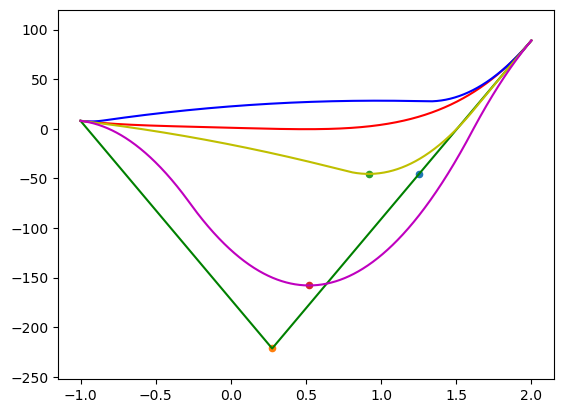

In [5]:
plot_problem([f, estim_ob.nestimator, estim_plip.estimator, estim_int.estimator, estim_lip.estimator], min_list, a, b)